# Chapter 2 - A First Example

In [1]:
# Imports
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# Look at training data
display(train_images.shape)

display(len(train_labels))

display(train_labels)

(60000, 28, 28)

60000

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [3]:
# Look at test data
display(test_images.shape)

display(len(test_labels))

display(test_labels)

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [4]:
# Create a model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])

display(model)

/home/jonathan/Projects/deep_learning_with_python/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-23 19:45:52.218124: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<Sequential name=sequential, built=True>

In [5]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

display(model)

<Sequential name=sequential, built=True>

In [6]:
# Reshape the image data for modeling
train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10_000, 28*28))
test_images = test_images.astype("float32")/255

display(train_images.shape)
display(test_images.shape)


(60000, 784)

(10000, 784)

In [7]:
# Fit the model

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8717 - loss: 0.4460
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9678 - loss: 0.1128
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9782 - loss: 0.0741
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9856 - loss: 0.0491
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9903 - loss: 0.0370


In [8]:
# Make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
display(predictions[0])
display(predictions[0].argmax())
display(predictions[0][1])
test_labels[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([1.1102010e-08, 1.0141533e-09, 1.0189021e-06, 1.4510752e-05,
       5.4217538e-12, 8.4059515e-08, 7.4597370e-13, 9.9998242e-01,
       3.0930256e-08, 1.7043315e-06], dtype=float32)

np.int64(7)

np.float32(1.0141533e-09)

np.uint8(7)

In [9]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9710 - loss: 0.0988
test_acc: 0.9761999845504761


## Data representations with Tensors

In [10]:
# Rank 0 tensor
import numpy as np 
x = np.array(12)
display(x)
display(x.ndim)

array(12)

0

In [11]:
# Rank 1 Tensor
x = np.array([12,3,6,14,7])
display(x)
display(x.ndim)

array([12,  3,  6, 14,  7])

1

In [12]:
# Rank 2 Tensor
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1]])
display(x)
display(x.ndim)

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1]])

2

In deep learning you will typically manipulate tensors with dimension 0 to 4, but you may
on occasion go to 5 if you are working with video data.

Tensors are defined by:

- Number of axes (ie rank)
- Shape (describes the dimensions)
- Data type (float16, float32)



In [13]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images.ndim

3

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images.dtype

dtype('uint8')

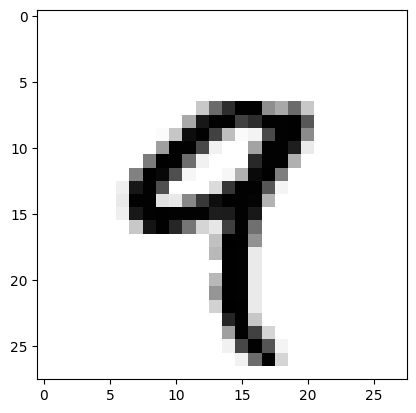

np.uint8(9)

In [17]:
import matplotlib.pyplot as plt 
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

display(train_labels[4])

### Manipulating Tensors in Numpy

In [18]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [19]:
my_slice = train_images[10:100, :, :]
display(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
display(my_slice.shape)

(90, 28, 28)

(90, 28, 28)

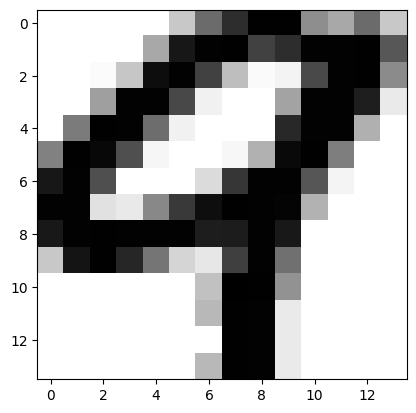

In [20]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[4], cmap=plt.cm.binary)
my_slice = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice[4], cmap=plt.cm.binary)

 You can see that you can use these operations to essentially crop the in images
 etc.

 ### Notion of data batches

 - The first axis will generally be the samples axis
 - In the example above the samples are images
 - The dataset is rarely processsed all at once
 - It is typically processed in batches
 - In our case the batch size is 128

In [21]:
batch0 = train_images[:128]
batch1 = train_images[128:256]

n = 3
batchn = train_images[128*n:128*(n+1)]

## Real world examples of tensors

- Vector (tabular) Data: Rank 2, (samples, features), where each sample is a vector
  of numerical attributes
- Time Series: Rank 3, (samples, timesteps, features)
- Images: Rank 4, (samples, height, width, channels), each pixes is representated by a vector
  of values
- Video: Rank 5, (samples, frames, heights, width, channels), where each sample is a sequence of frames

## The gears of neural networks: Tensor operations

In [22]:
import keras

### A Dense layer

```python
keras.layers.Dense(512, activation='relu')
```

- This is a function that takes an input matrix and returns another matrix

```python
output = relu(dot(input, W) + b)
```
There are three tensor operations here

- a dot product
- tensor addition
- a relu operation, $max(x, 0)$.

#### Elementwise Operations

Note the $relu$ and $+$ are elementwise operations, while the dot is a matrix operation

- There is elementwise addition, subtraction, multiplication, ...

#### Dot Products

Same as in matrix algebra

#### Tensor reshaping

The operation of reshaping a matrix/tensor

In [23]:
train_images = train_images.reshape((60_000, 28*28))
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
display(x.shape)

x = x.reshape((6,1))
display(x)
display(x.shape)

x = x.reshape((2,3))
display(x)
display(x.shape)

(3, 2)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

(6, 1)

array([[0., 1., 2.],
       [3., 4., 5.]])

(2, 3)

#### Transposition

This just transposes the matrix/tensor

In [24]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric Interpretations of tensor operations

- Tensor addition acts like a translation of an object to a new position, without
  distoring the object

$$
\begin{bmatrix}HorizontalFactor \\
               VerticalFactor
\end{bmatrix} + 
\begin{bmatrix}x \\
               y
\end{bmatrix}
$$

- Rotation (counterclockwise): a dot product with 
$$R = \begin{bmatrix}cos(\theta) & -sin(\theta) \\
                     sin(\theta) & cos(\theta)
      \end{bmatrix} \cdot 
      \begin{bmatrix}x \\
                     y
      \end{bmatrix}
$$

- Scaling: Vertical and horizontal scaling can be achieve with a diagonal matrix

$$
S = \begin{bmatrix}
    HorizontalFactor & 0 \\
    0 & VerticalFactor
    \end{bmatrix} \cdot 
    \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
$$

- Linear Transform: A dot product with an arbitrary matrix. This encompasses scaling
  and rotation
- Affine transform: The combination of a linear transform and a translation. Note
  $y = W \cdot x + b$ is affine. Note that an affine transform of an affine transform
  is an affine transform. This means that neural networks w/o activation functions
  would just be linear models in disguise.
  

## Stochastic Gradient Descent - Front Pass

- SGD is the method of minimizing the loss function
- It essentially evaluates the partial derivative for all dimensions (weights)
  and then moves in the opposite direction related to the learning rate to minimize the
  loss function
- There are many different version of SGD, or optimizers
- A common enhancement to vanilla SGD is to add the concept of momentum.
  Adagrad, RMSprop, and others
- Momentum aids in convergence speed and helps avoid local minima.

## Backpropagation and the Chain Rule

- Tensor operations have simple derivatives, allowing them to be chained together
- Computation graphs can be used to program extensive chained operations
- Computation graphs let you encode commputable expressions as a machine readable data
  structure
- Reversing computation graphs and using gradients allow for the creation of the
  back pass.

## The Gradient Tape

GradientTape is a python scope that will "record" the tensor operations that
run inside as a computation graph, or "tape".

In [25]:
import tensorflow as tf 
x = tf.Variable(0.)

display(x)

with tf.GradientTape() as tape:
    y = 2 * x + 3
    
grad_of_y_wrt = tape.gradient(y, x)
display(grad_of_y_wrt)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [26]:
x = tf.Variable(tf.random.uniform((2,2)))

display(x)

with tf.GradientTape() as tape:
    y = 2 * x + 3

grad_of_y_wrt_x = tape.gradient(y, x)
display(grad_of_y_wrt_x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.9421779 , 0.9391178 ],
       [0.05843091, 0.04629719]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [27]:
# It works on lists of variables

W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros(2,))
x = tf.random.uniform((2,2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
    
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

display(grad_of_y_wrt_W_and_b)

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.34755123, 0.34755123],
        [0.2885387 , 0.2885387 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## A short review of the first example

In [28]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

- Here you transform data into several tensors
- Each pixel in the image represents an input feature and there are 512 of them

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

- Above you see you have a layer with the activation function relu
- Each layer is applying tensor functions
- The weights that are calibrated hold the knowledge

In [30]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- We have specified the loss function and the optimizer that will be used
  for the optimizer
- We have also specified metrics to track

In [31]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8716 - loss: 0.4394
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9663 - loss: 0.1151
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9789 - loss: 0.0712
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9844 - loss: 0.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9883 - loss: 0.0393


- the model iterates on batches of 128 images
- It does 5 passes or epochs
- Ir performs 2,345 gradient updates

## Reimplementing the first example from scratch with Tensorflow

- Here we will barely using any keras functions

In [32]:
# The dense layer
import tensorflow as tf 

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        return [self.W, self.b]
        
    

In [33]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [34]:
model = NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.relu),
    
])

assert len(model.weights) == 4

In [35]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images =images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images)/batch_size)
        
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels
    
    

In [36]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [37]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [38]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [39]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10_000, 28*28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 1
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 2
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 3
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 4
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 5
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 6
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 7
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 40

In [40]:
# Evaluating the Model
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.10


# Chapter 3 - Intro to Keras and Tensorflow

## First steps with Tensorflow

In [41]:
# All ones or zeroes
import tensorflow as tf
x = tf.ones(shape=(2,1))
display(x)

x = tf.zeros(shape=(2,1))
display(x)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [42]:
# Random Tensors
x = tf.random.normal(shape=(3,1), mean=0, stddev=1.)
display(x)

x = tf.random.uniform(shape=(3,1), minval=0, maxval=1.)
display(x)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.40620336],
       [-0.9248396 ],
       [ 0.94894123]], dtype=float32)>

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.02031791],
       [0.47261822],
       [0.8008653 ]], dtype=float32)>

- Numpy arrays are assignable
- Tensors are not

In [43]:
# Tensor variables
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
display(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3252498 ],
       [ 0.23173377],
       [-0.9708612 ]], dtype=float32)>

In [44]:
# Assigning values to a Tensorflow Variable
v.assign(tf.ones((3,1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [45]:
# You can assign to a subset
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [46]:
# Assign Add
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [47]:
# Assign subtract
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [48]:
# Tensor Math
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c 
e = tf.matmul(a, b)
e *= d

display(a)
display(b)
display(c)
display(d)
display(e)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

## Gradient Tape API

In [49]:
# Gradient with a Variable
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

In [50]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [51]:
# Gradient with a Constant
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(result, input_const)
    
gradient = tape.gradient(result, input_const)

In [52]:
# Second order gradient
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

## An End to End Example: A Linear Classifier

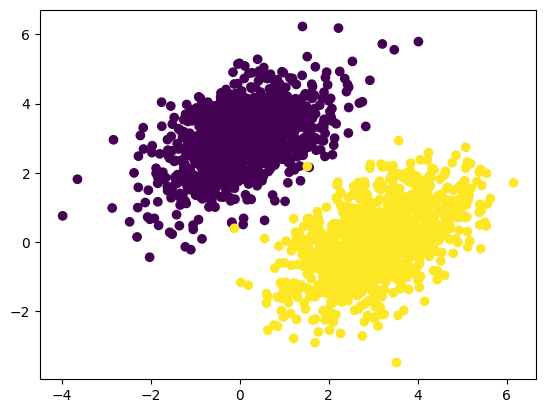

In [53]:
# Create the data
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], 
                                                 cov=[[1, 0.5],[0.5, 1]],
                                                 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], 
                                                 cov=[[1, 0.5],[0.5, 1]],
                                                 size=num_samples_per_class)

# Stack the data
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generate the targets
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

# Plot the data
import matplotlib.pyplot as plt 
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show()

In [54]:
# Create the linear classifier
input_dim = 2               # 2d input points
output_dim = 1              # One score per sample (0 or 1)

# Create W, b
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

# Create the forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

# Define the loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

# Define the training step
def training_step(inputs, targets):
    
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    return loss

Here we do just batch trainoing instead of mini batch

In [55]:
# The batch training loop
for step in range(100):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.0960
Loss at step 1: 0.4124
Loss at step 2: 0.1606
Loss at step 3: 0.1172
Loss at step 4: 0.1046
Loss at step 5: 0.0971
Loss at step 6: 0.0909
Loss at step 7: 0.0852
Loss at step 8: 0.0800
Loss at step 9: 0.0753
Loss at step 10: 0.0710
Loss at step 11: 0.0670
Loss at step 12: 0.0634
Loss at step 13: 0.0601
Loss at step 14: 0.0571
Loss at step 15: 0.0544
Loss at step 16: 0.0519
Loss at step 17: 0.0496
Loss at step 18: 0.0475
Loss at step 19: 0.0455
Loss at step 20: 0.0438
Loss at step 21: 0.0422
Loss at step 22: 0.0407
Loss at step 23: 0.0394
Loss at step 24: 0.0381
Loss at step 25: 0.0370
Loss at step 26: 0.0360
Loss at step 27: 0.0350
Loss at step 28: 0.0342
Loss at step 29: 0.0334
Loss at step 30: 0.0327
Loss at step 31: 0.0320
Loss at step 32: 0.0314
Loss at step 33: 0.0309
Loss at step 34: 0.0304
Loss at step 35: 0.0299
Loss at step 36: 0.0295
Loss at step 37: 0.0291
Loss at step 38: 0.0288
Loss at step 39: 0.0285
Loss at step 40: 0.0282
Loss at step 41: 0.0279
Lo

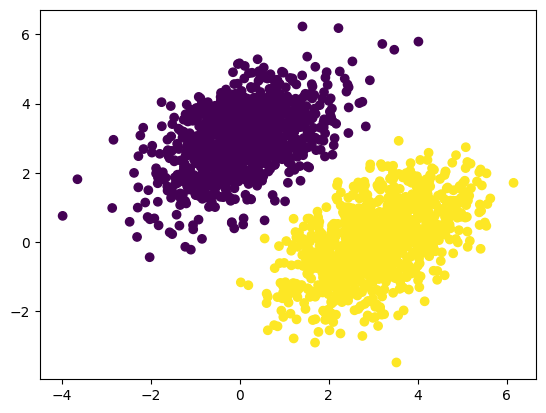

In [56]:
# Plot the results
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

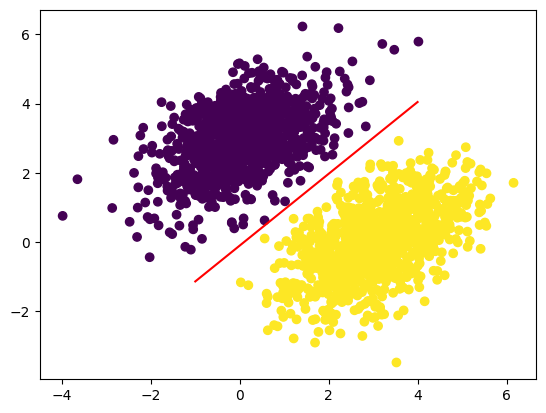

In [57]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a Neural Network

### Layers

Layers are data processing modules that take as input one or more tensors and that
output one or more tensors. Some layers are stateless, but more frequently layers
have a state, the weights.

There are different types of layers

- Dense: often used for (sample, features), rank 2, ie tabular data
- Recurrent layers: Time series, (samples, timesteps, features),
  LSTM layers, or 1D convolution (Conv1D)). Image data, rank 4 tensors are
  processed by Conv2D.

Layers are the building blocks of deep learning

#### The Base Layer

The `Layer` class is what other layers inherit from. It captures a state and 
some computation. The weights are defined in a `build()` constructor. The computation
is in the `call()` method.

##### Implementing a custom layer

In [58]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):                                          # 1
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):                                               # 2
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),                 # 3
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
        
    def call(self, inputs):                                                     # 4
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return(y)

1. All Keras Layers inherit from `Layer`
2. Weight (stateful variables) creation happens in `build()`
3. add_weight() is a shortcut method for creating weights. It can also be done by
   creating standalone variables and assign them as layer attributes, like
   `self.W = tf.Variable(tf.random.uniform(w_shape))
4. We define the forward pass computation in the `call()`

Layer compatibility refers to the fact that every layer will only accept input tensors
of a certain shape and return tensors of a certain shape.

Most Keras layers require you to worry about size compatibility. They are dynamically
built to recognize the inputs.

In [59]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


Note that the `__call__()` method handles shape inference and other things like
the routing between eager and graph execution. Just remember, when implementing
your own layers put your foreword pass logic in your `call()` method.

To learn from data, you tend to make assumptions. These assumptions define what
can be learned, ie the structure of your hypothesis space. The architecture of your
model is very important. It encodes the assumptions about the problem in your
model. For example, if you are working on a two class classification problem with
a single dense layer with no activation (a pure affine transformation), you are assuming
your two classes are linearly separable.

Picking the right network is more art than science, though there are some best practices.

In addition to specifying your architecture you have to choose the following:

- Loss Function
- Optimizer
- Metrics for evaluation

In [60]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

Note the strings above are actual shortcuts for the related objects. These objects
can have parameters of their own. See below

In [61]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a Loss Function

This is very important. The optimization will take any shortcut to minimize the
loss function. There are some simple guidelines to choosing the correct loss
function for most common problems.

- Two Class Classification: Binary Crossentropy
- Many Class Classification: Categorical Crossentropy
- ...More to come

### The Fit Method

Arguments

- Inputs (numpy array or TF dataset): the training set
- Targets: The target values for the data set
- Epochs: number of times the training loop executes
- Batch Size: size of the mini batch gradient descent training examples


In [62]:
# Calling .fit()
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.1107 - loss: 12.9614   
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.1243 - loss: 12.7504 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.1239 - loss: 12.9388 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.1173 - loss: 13.0983 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.1232 - loss: 12.3584 


### The History Object

This object contains the results of the epochs. Note that these are the in sample
values

In [63]:
history.history

{'binary_accuracy': [0.12099999934434891,
  0.12150000035762787,
  0.12200000137090683,
  0.12200000137090683,
  0.12250000238418579],
 'loss': [12.868029594421387,
  12.825304985046387,
  12.788311958312988,
  12.752212524414062,
  12.715957641601562]}

### Monitoring Loss and Metrics on the Validation Set

You can use the `validation_data` argument on the `fit()` method.

In [64]:
# Define the model
model = keras.Sequential([keras.layers.Dense(1)])

# Compile the model
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# Define all of the splits
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

# Fit the model w/ a validation set
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.9385 - loss: 0.2110 - val_binary_accuracy: 0.9900 - val_loss: 0.0417
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9509 - loss: 0.0697 - val_binary_accuracy: 0.9017 - val_loss: 0.0969
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9472 - loss: 0.0764 - val_binary_accuracy: 0.9633 - val_loss: 0.0815
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9381 - loss: 0.0940 - val_binary_accuracy: 0.9383 - val_loss: 0.1101
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9734 - loss: 0.0630 - val_binary_accuracy: 0.9267 - val_loss: 0.2113


Notice that you now get the `val_binary_accuracy` and the `val_loss` that
show the accuracy and loss for the validation set

Note if you want to calculate the validation loss and metrics after the training
is done you can call the `evaluate()` method:

In [65]:
# Evaluate the model
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)
loss_and_metrics

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9238 - loss: 0.2172


[0.21128572523593903, 0.9266666769981384]

### Inference after the model

You can use the `predict()` method on the model and specify the batch size.

```python
predictions = model.predict(new_inputs, batch_size=128)
```

In [66]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[ 1.3631527 ]
 [ 0.39946285]
 [ 1.3683794 ]
 [ 1.9927354 ]
 [ 1.9460552 ]
 [ 1.0334518 ]
 [-0.06451124]
 [ 1.8269081 ]
 [ 0.50414914]
 [ 0.4080192 ]]


## Summary

- Tensorflow is an great framework for numerical computing on CPU, GPU, or TPU.
  It calculates gradients and can export programs to various runtimes.
- Keras is the standard API for doing deep learning with TensorFlow
- The central class of Keras is the Layer. You can inherit from this layer and 
  create your own layers with custom functionality
- Before training your model you have to compile it specifying the optimizer, loss function,
  and evaluation metrics.
- Training the model is done with the `fit()` method, which runs the optimization.
  You can use it to monitor metrics and loss on the training and validation sets.
- You can use the `model.predict()` method to make predictions on the model. You 
  can use the `batch_size` argument to break it into pieces.

# Chapter 4 - Getting started: Classification and Regression

## Glossary

- Sample/input - One datapoint that goes into your model
- Prediction or output - What comes out of your model
- Target - The truth. What your model should ideally have predicted, according to
  external source data
- Prediction error or loss value - A measure of he distance between your model prediction
  and the target
- Classes - A set of possible labels to choose from in a classification problem. For
  example, when classifying cat and dog pictures, "dog" and "cat" are two classes
- Label - a specific instance of a class annotation in a classification problem
- Ground-truth or annotations - All targets for a dataset, typically collected by humans
- Binary Classification - A classification task where each input sample should be categorized
  into two exclusive categories
- Multiclass classification - A classification task where each input sample should be categorized
  into more that two categories
- Multilabel classification - A classification task where each input sample can be assigned multiple
  lables. One instance can have multiple labels like "cat" and "dog", for an image containing both
- Scalar regression - A task where the tareget is a continous scalar value. Ex. Predicting house
  prices.
- Vector regression - A task where the target is a set of continous values: for example finding
  the bounding box of an image.
- Minibatch or batch - a small set of samples (typically between 8 and 128) that are processed
  simultaneously by the model. The number of samples is most often a power of 2 to facilitate
  memory allocation on a GPU. Each minibatch is used to calculate a single SGD update for the model
  weights.

## Classifying movie reviews: A binary classification example



In [67]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Note that the data datasets are lists of word indicies. The labels are simply
values of 0s and 1s.

In [68]:
display(train_data[0])
display(train_labels[0])

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

np.int64(1)

In [69]:
# Encoding back to words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = "".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

### Prepare the data

- Pad lists so they have the same length
- Change them to an integer tensor of shape (samples, max_length)
- Start the model with an embedding layer
- multi-hot encode your lists turning them into vectors of 0s and 1s

In [70]:
# Encoding the integers sequences via multi-hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    display(results)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

display(x_train.shape)
display(x_train[:5, :])

# vectorize your labels as well
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Show the shape of inputs
display(x_train[0])
display(y_train[0])


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(25000, 10000))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(25000, 10000))

(25000, 10000)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(5, 10000))

array([0., 1., 1., ..., 0., 0., 0.], shape=(10000,))

np.float32(1.0)

### Build the Model

We will use stacked dense layers with `relu` activation functions.

Key Questions

- How many layers to use
- How many units for each layer

- We will use 2 intermediate layers with 16 units each
- A third layer that will output scalar prediction for the sentiment


In [71]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Note that the `relu` activation implements the following:

```python
output = relu(dot(input, W) + b)
```
16 units meand W has a shape of (input_dimension, 16), in this case
it is (10,000, 16).

Dimensionality can be represent how much freedom that you give your model.

The `relu` basically zeros out the negative numbers. the sigmoid forces number
into the interval [0,1], giving a sort of probability interpretation.

For a binary classification you should choose the `binary_crossentropy` for the 
loss. Cross entropy is a quantity from information theory that measures the distance
between probability distributions, or in this case the actual distribution and
the predictions.

#### Activation Functions

Without activation functions the dot product would simply be a linear function.
If we just applied layers with no activation functions only linear relationships
could be learned. This nullifies the benefits of multiple layers. `relu` is common,
but there are other options, `prelu`, `elu`, etc.


In [72]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

- Deep learning models should never be evaluated on the training data
- Use a validation set to evaluate performance while training


In [73]:
# Create a validation set from the training set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [74]:
# Train the model for 20 epoch
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2025-04-23 19:48:04.324502: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6899 - loss: 0.6050 - val_accuracy: 0.8513 - val_loss: 0.4143
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8886 - loss: 0.3521 - val_accuracy: 0.8815 - val_loss: 0.3189
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9181 - loss: 0.2555 - val_accuracy: 0.8869 - val_loss: 0.2892
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9280 - loss: 0.2117 - val_accuracy: 0.8854 - val_loss: 0.2846
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9451 - loss: 0.1679 - val_accuracy: 0.8841 - val_loss: 0.2867
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9583 - loss: 0.1388 - val_accuracy: 0.8890 - val_loss: 0.2812
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9653 - loss: 0.1187 - val_accuracy: 0.8859 - val_loss: 0.2929
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9705 - loss: 0.1058 - val_accuracy: 0.8840 - val_loss: 0.

The `model.fit()` returns a History object. It has a `history` member that has all of the 
results from the training session.

In [75]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

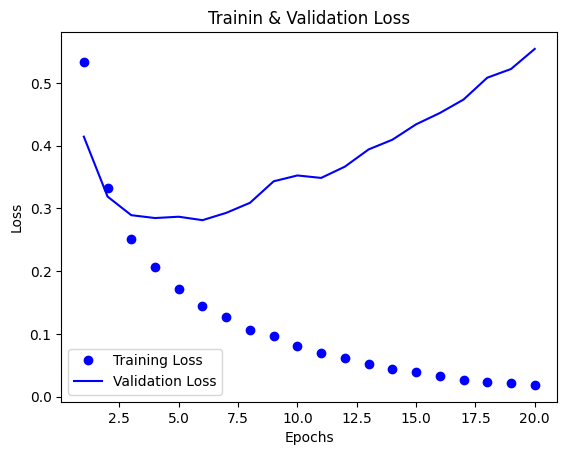

In [76]:
# Plot the losses
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Trainin & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

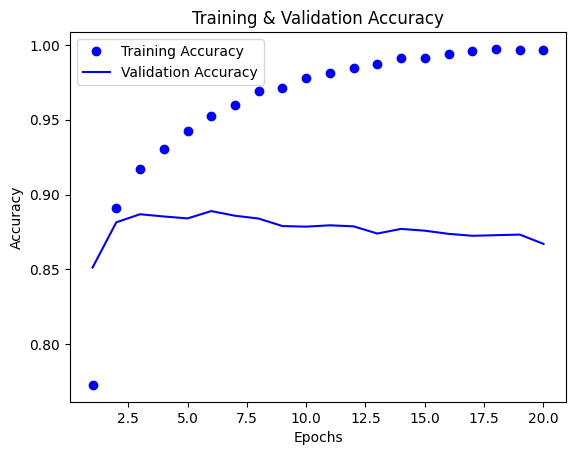

In [77]:
# Plot the accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- You can see the model starts overfitting after 4 epochs

Lets retrain to 4 epochs

In [78]:
# Retrain on 4 epochs
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


2025-04-23 19:48:29.248114: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7105 - loss: 0.5718
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9007 - loss: 0.2943
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9218 - loss: 0.2259
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9344 - loss: 0.1860


2025-04-23 19:48:37.172278: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8812 - loss: 0.2897


In [79]:
display(results)

[0.28662779927253723, 0.8849999904632568]

Note the first number is the test loss and the second number is the test accuracy, 88%. This is
a fairly naive approach. With some state of the art approahes you can get this to near 95%.

### Generate New Preditions

In [80]:
model.predict(x_test)

 18/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step   

2025-04-23 19:48:42.130502: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.24807656],
       [0.9993326 ],
       [0.89929   ],
       ...,
       [0.12992713],
       [0.09122141],
       [0.6102571 ]], shape=(25000, 1), dtype=float32)

### Wrapping Up

- There is usually a lot of preprocessing involved
- Stacks of Dense layers with `relu` activation functions can solve many problems
- A binary classification ends with an output layer of one node, and a sigmoid
  activation function
- You should use a `binary_crossentropy`
- The `rmsprop` optimizer is typically a good choice

## Classifying Newswires

In [83]:
# Load the dataset
from tensorflow.keras.datasets import reuters
(train_data, train_lables), (test_data, test_labels) = reuters.load_data(num_words=10_000)
display(len(train_data))
display(len(test_data))
train_data[10]

8982

2246

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [86]:
# Decode newswires
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = "".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
display(decoded_newswire)
display(train_labels[10])

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

np.int64(1)

In [88]:
# Prepare the Data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train.shape

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(8982, 10000))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2246, 10000))

(8982, 10000)

In [94]:
# One Hot encoding (on your own)
def to_one_hot(labels, dimension=46): 
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels): 
        results[i, label] = 1.
    return results 
    
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

display(test_labels)

# In Keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

display(y_test)

array([ 3, 10,  1, ...,  3,  3, 24], shape=(2246,))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2246, 46))

In [95]:
# Building the Model
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

- Note there are 46 outputs in the output layer
- Note the use of softmax means that the output is a probability distribution
  over the 46 output classes
- The best loss is the `categorical_crossentropy`.

In [96]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Set aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = 